---
title: Least Squares Optimization
type: submodule
---

In [1]:
%matplotlib inline
import numpy
import numpy.random
import matplotlib.pyplot as plt
import numpy.linalg


Define your x variable

In [2]:
x = numpy.r_[-10:10:.5]

Define y as a function of x.  This can be anything

In [3]:
#y = x
#y = x**2
#y = x**3
y = numpy.sin(x)
y /= y.max()

Now create an array of normally distributed noise

In [4]:
rand = numpy.random.randn(*y.shape)/10
y_rand = y+rand

Plot y against the random vector

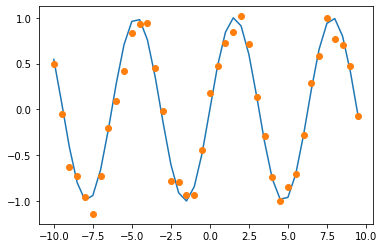

In [5]:
plt.plot(x,y)
plt.plot(x,y_rand,'o')

Now assume you create a model of the form $y(k)^*$ where k are your model coefficients.  You want to pick your model in such a way that the error from $y-y^*$ is minimized.  The residual error, or just residual can be expressed as 

$$r=y-y^*$$

thus the sum of squared error is 

$$||r||^2 = ||y-y^*||^2 = y^T y - 2*y^Ty^* + {y^*}^T y^*$$

Now in matrix form, $y^*$ takes the form $y^*=Ak$, where $k$ is your set of model weights in the form

$$k=\left[\begin{matrix}k_1&k_2&\ldots &k_m\end{matrix}\right]^T,$$

and $A$ is your set of models applied to the input variable $x$
$$A = A(x) = \left[\begin{matrix}
a_1(x_0) & a_2(x_0)& \ldots& a_m(x_0)\\
a_1(x_1) & a_2(x_1)& \ldots &a_m(x_1)\\
\vdots & \vdots & \ddots& \vdots\\
a_1(x_n) & a_2(x_n)& \ldots& a_m(x_n)\\
\end{matrix}
\right]$$

### Example

In our case we will try to model our data with $A(x) = \left[\begin{matrix}x&x^2&x^3&\sin(x)\end{matrix}\right]$

In [6]:
A = numpy.array([x,x**2,x**3,numpy.sin(x)]).T
A.shape

(40, 4)

With the model stated, we may now expand the sum of squared error with our model:

$$||r||^2 = y^T y - 2y^T(Ak) + k^TA^TAk$$

But when optimizing, you are not optimizing for $x$ or even $A(x)$, which is either given or selected by you, but for the $k$ weighting parameters, which you may select in order to minimize the above equation.  Thus the error will be minimized at the point where $$\frac{d(||r||^2)}{dk}=0,$$ or 

$$ - 2y^T A+ 2k^T A^T A=0$$

Solving for k,
$$ k^T A^T A= y^T A$$
$$ (k^T A^T A)^T= (y^T A)^T$$
$$ (A^T A)^Tk=  A^Ty$$
$$ (A^T A)k=  A^Ty$$
$$ (A^T A)^{-1}(A^T A)k=  (A^T A)^{-1}A^Ty$$

The optimimum value for k is thus

$$ k=  (A^T A)^{-1}A^Ty$$

### Example

In [7]:
B = numpy.linalg.inv(A.T.dot(A))
coeff = B.dot(A.T.dot(y_rand))

Plotting the coefficients, we see that the weights for $x^3$ are near 1 while all other weights are quite small.

[Text(0, 0, '$x$'),
 Text(1, 0, '$x^2$'),
 Text(2, 0, '$x^3$'),
 Text(3, 0, '$\\sin(x)$')]

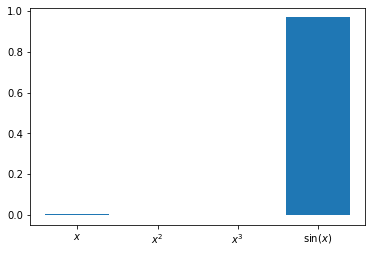

In [8]:
xx = numpy.r_[:4]
labels = '$x$','$x^2$','$x^3$','$\sin(x)$'
f = plt.figure()
ax = f.add_subplot()
ax.bar(xx,coeff)
ax.set_xticks(xx)
ax.set_xticklabels(labels)

To return $y^*$, 

In [9]:
y_model = A.dot(coeff)

Plotting the noisy data against the model, we get

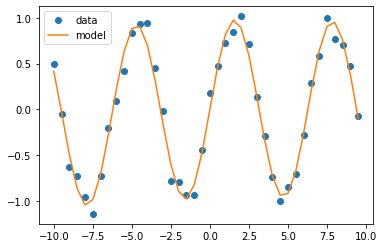

In [10]:
fig = plt.figure()
ax = fig.add_subplot()

a = ax.plot(x,y_rand,'o')
b = ax.plot(x,y_model)

ax.legend(a+b,['data','model'])

And finally, to plot the residual

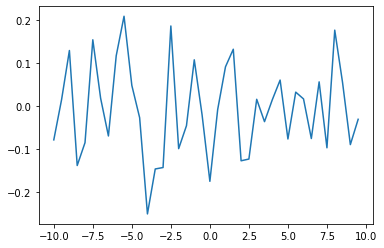

In [11]:
plt.figure()
plt.plot(x,y_model-y_rand)

Now try other models, higher resolution data, and different domains